# 1083 Albumin Initial ML

### By: Ian Weimer

## Imports

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
import math
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from statsmodels.regression.linear_model import OLS
from sklearn.model_selection import cross_val_score
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve
import warnings
from sklearn.compose import make_column_transformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import balanced_accuracy_score
pd.set_option('display.max_columns', None)

## Load Albumin Data From Pre-processing and Exploratory Analysis

In [10]:
df = pd.read_csv('albumin_cleaned_3.csv')

In [11]:
# drop insignificant vars

#df.drop(columns = ['bed_size', 'Cirrhosis', 'tenant'], inplace=True)

In [12]:
df.head()

age  sex  zip_code  bed_size  ICU    LOS_hours  mass_transfusion  \
0  45.0    1         1       5.0    1  1016.016667                 0   
1  42.0    1         0       5.0    0   698.150000                 0   
2  73.0    1         2       4.0    0   135.266667                 0   
3  73.0    1         6       4.0    0    58.183333                 0   
4  70.0    0         8       5.0    0   333.866667                 0   

   total_transfusions  anemia_status  CCI  30_day_mortality  \
0                   1            2.0    6                 0   
1                   0            0.0    3                 0   
2                   0            3.0    2                 0   
3                   2            1.0    2                 0   
4                   0            0.0    2                 0   

   30_day_readmission  albumin_value  hemoglobin  albumin_24hrs  MELD  qSOFA  \
0                   0            2.9         8.4            0.0  11.0      1   
1                   0            3.8        16.1            0.0  13.0      2   
2                   0            1.5         5.6            0.0   9.0      0   
3                   0            2.5        10.3            1.0   9.0      0   
4                   0            3.9        14.0            1.0  10.0      0   

   Cirrhosis  beta_blocker  hemorrhagic  SAPS  tenant  albumin  
0          1             1            0    34      45        1  
1          0             1            0    54      73        1  
2          1             0            0    43     111        1  
3          1             0            0    18     120        1  
4          1             1            0    41      63        1

In [13]:
df.shape

(46629, 23)

In [14]:
df = df.drop(columns=['LOS_hours', '30_day_mortality'])

In [15]:
df['30_day_readmission'].describe()

count    46629.000000
mean         0.347938
std          0.476321
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: 30_day_readmission, dtype: float64

In [16]:
df['albumin_value'].describe()

count    46629.000000
mean         3.166509
std          0.659375
min          1.160000
25%          2.700000
50%          3.200000
75%          3.600000
max          5.100000
Name: albumin_value, dtype: float64

In [17]:
df.describe()

age           sex      zip_code      bed_size           ICU  \
count  46629.000000  46629.000000  46629.000000  46629.000000  46629.000000   
mean      67.988312      0.545455      4.722812      4.509125      0.195458   
std       14.622518      0.497935      3.371110      0.900318      0.396557   
min       21.000000      0.000000      0.000000      0.000000      0.000000   
25%       59.000000      0.000000      1.000000      4.000000      0.000000   
50%       70.000000      1.000000      5.000000      5.000000      0.000000   
75%       80.000000      1.000000      8.000000      5.000000      0.000000   
max       89.000000      1.000000      9.000000      5.000000      1.000000   

       mass_transfusion  total_transfusions  anemia_status           CCI  \
count      46629.000000        46629.000000   46629.000000  46629.000000   
mean           0.023419            0.655708       1.742199      3.359412   
std            0.151231            1.095456       1.083163      2.633050   
min            0.000000            0.000000       0.000000      0.000000   
25%            0.000000            0.000000       1.000000      1.000000   
50%            0.000000            0.000000       2.000000      3.000000   
75%            0.000000            1.000000       3.000000      5.000000   
max            1.000000            6.000000       3.000000     19.000000   

       30_day_readmission  albumin_value    hemoglobin  albumin_24hrs  \
count        46629.000000   46629.000000  46629.000000   46629.000000   
mean             0.347938       3.166509      8.785832       0.042506   
std              0.476321       0.659375      2.675857       0.201742   
min              0.000000       1.160000      1.600000       0.000000   
25%              0.000000       2.700000      6.800000       0.000000   
50%              0.000000       3.200000      8.500000       0.000000   
75%              1.000000       3.600000     10.600000       0.000000   
max              1.000000       5.100000     17.000000       1.000000   

               MELD         qSOFA     Cirrhosis  beta_blocker   hemorrhagic  \
count  46629.000000  46629.000000  46629.000000  46629.000000  46629.000000   
mean      11.752025      0.416329      0.933132      0.311373      0.054816   
std        6.436456      0.642641      0.249796      0.463060      0.227623   
min        6.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.000000      0.000000      1.000000      0.000000      0.000000   
50%        9.000000      0.000000      1.000000      0.000000      0.000000   
75%       14.000000      1.000000      1.000000      1.000000      0.000000   
max       40.000000      3.000000      1.000000      1.000000      1.000000   

               SAPS        tenant       albumin  
count  46629.000000  46629.000000  46629.000000  
mean      25.137768     60.925926      0.122027  
std       10.226741     23.521380      0.327321  
min        0.000000      1.000000      0.000000  
25%       18.000000     45.000000      0.000000  
50%       24.000000     63.000000      0.000000  
75%       31.000000     68.000000      0.000000  
max       60.000000    120.000000      1.000000

## Standardize Data

In [18]:
cols = df.columns

#instantiate min-max scaling object
mm = MinMaxScaler()
# fit and transform feature dataframe
df = pd.DataFrame(mm.fit_transform(df))
# reassign column names so new dataframe has corresponding names
df.columns = cols

In [19]:
df.head()

age  sex  zip_code  bed_size  ICU  mass_transfusion  \
0  0.352941  1.0  0.111111       1.0  1.0               0.0   
1  0.308824  1.0  0.000000       1.0  0.0               0.0   
2  0.764706  1.0  0.222222       0.8  0.0               0.0   
3  0.764706  1.0  0.666667       0.8  0.0               0.0   
4  0.720588  0.0  0.888889       1.0  0.0               0.0   

   total_transfusions  anemia_status       CCI  30_day_readmission  \
0            0.166667       0.666667  0.315789                 0.0   
1            0.000000       0.000000  0.157895                 0.0   
2            0.000000       1.000000  0.105263                 0.0   
3            0.333333       0.333333  0.105263                 0.0   
4            0.000000       0.000000  0.105263                 0.0   

   albumin_value  hemoglobin  albumin_24hrs      MELD     qSOFA  Cirrhosis  \
0       0.441624    0.441558            0.0  0.147059  0.333333        1.0   
1       0.670051    0.941558            0.0  0.205882  0.666667        0.0   
2       0.086294    0.259740            0.0  0.088235  0.000000        1.0   
3       0.340102    0.564935            1.0  0.088235  0.000000        1.0   
4       0.695431    0.805195            1.0  0.117647  0.000000        1.0   

   beta_blocker  hemorrhagic      SAPS    tenant  albumin  
0           1.0          0.0  0.566667  0.369748      1.0  
1           1.0          0.0  0.900000  0.605042      1.0  
2           0.0          0.0  0.716667  0.924370      1.0  
3           0.0          0.0  0.300000  1.000000      1.0  
4           1.0          0.0  0.683333  0.521008      1.0

## Modeling

In [21]:
# establish target feature, 30 day readmission, as y feature
y = df['30_day_readmission']
# drop target feature from features dataframe
X = df.drop(columns = ['30_day_readmission'], axis = 1)
# save dataframe column titles to list for reassigning after min max scale 
cols = X.columns

In [22]:
# train test split from target feature series and the predicting feature dataframe (set test size to 20% of data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 33)

## Logistic Regression

In [23]:
# instantiate a Logistic Regression model without an intercept, 'liblinear' solver method
logreg = LogisticRegression(C=0.3, penalty='l1', solver = 'liblinear')
# fit the model to X and y training sets
logreg.fit(X_train, y_train)

LogisticRegression(C=0.3, penalty='l1', solver='liblinear')

Feature: age Score: 0.00000
Feature: sex Score: -0.01854
Feature: zip_code Score: 1.19796
Feature: bed_size Score: 1.17748
Feature: ICU Score: 0.19131
Feature: mass_transfusion Score: -0.29001
Feature: total_transfusions Score: 2.04492
Feature: anemia_status Score: 0.07061
Feature: CCI Score: 0.99012
Feature: albumin_value Score: -0.71128
Feature: hemoglobin Score: 0.34443
Feature: albumin_24hrs Score: 0.13947
Feature: MELD Score: -0.37744
Feature: qSOFA Score: -0.13198
Feature: Cirrhosis Score: 0.00000
Feature: beta_blocker Score: 0.11130
Feature: hemorrhagic Score: -0.14147
Feature: SAPS Score: -0.00346
Feature: tenant Score: -0.34243
Feature: albumin Score: -0.15529


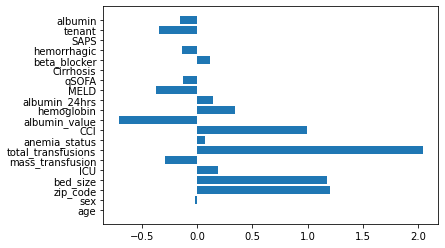

In [24]:
# general quick feature importance
# get coefficients for importance
# coefficients represent the log odds that an observation is in the
# target class, given the values of its X variables

importance = logreg.coef_[0]
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

                    Importance
total_transfusions    7.728548
zip_code              3.313337
bed_size              3.246190
CCI                   2.691565
hemoglobin            1.411188
ICU                   1.210829
albumin_24hrs         1.149664
beta_blocker          1.117732
anemia_status         1.073166
Cirrhosis             1.000000
age                   1.000000
SAPS                  0.996548
sex                   0.981634
qSOFA                 0.876354
hemorrhagic           0.868084
albumin               0.856165
mass_transfusion      0.748255
tenant                0.710040
MELD                  0.685616
albumin_value         0.491015


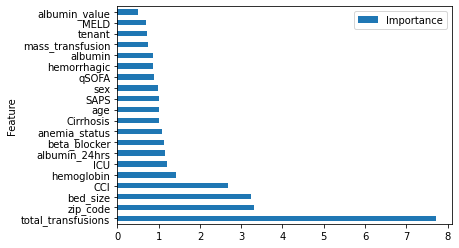

In [25]:
# convert log odds into regular odds with exponentiation
# np.exp()
# and list values, visualize in bar plot

odds = np.exp(logreg.coef_[0])
feature_importance = \
            pd.DataFrame(odds, 
             X.columns, 
             columns=['Importance'])\
            .sort_values(by='Importance', ascending=False)
        
ax = feature_importance.plot.barh(xlabel='Feature', ylabel='Importance')
print(feature_importance)
plt.show()

In [26]:
# Generate model prediction data for train and test sets
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [27]:
# calculate residual differences between train data and predictions
residuals = np.abs(y_train - y_hat_train)
# print value counts of predicted values 
print(pd.Series(residuals).value_counts())
print('----------------------------------')
# print normalized value counts of predicted values
print(pd.Series(residuals).value_counts(normalize = True))

0.0    26414
1.0    10889
Name: 30_day_readmission, dtype: int64
----------------------------------
0.0    0.708093
1.0    0.291907
Name: 30_day_readmission, dtype: float64


In [28]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[22908  1471]
 [ 9418  3506]]


In [29]:
# model metrics for training set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

         0.0       0.71      0.94      0.81     24379
         1.0       0.70      0.27      0.39     12924

    accuracy                           0.71     37303
   macro avg       0.71      0.61      0.60     37303
weighted avg       0.71      0.71      0.66     37303



In [30]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[5648  378]
 [2378  922]]


In [31]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

         0.0       0.70      0.94      0.80      6026
         1.0       0.71      0.28      0.40      3300

    accuracy                           0.70      9326
   macro avg       0.71      0.61      0.60      9326
weighted avg       0.71      0.70      0.66      9326



## Decision Tree

In [32]:
# instantiate a decision tree model
dt = tree.DecisionTreeClassifier()
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier()

Feature: age Score: 0.11823
Feature: sex Score: 0.02175
Feature: zip_code Score: 0.17868
Feature: bed_size Score: 0.01409
Feature: ICU Score: 0.00919
Feature: mass_transfusion Score: 0.00416
Feature: total_transfusions Score: 0.02253
Feature: anemia_status Score: 0.00973
Feature: CCI Score: 0.04614
Feature: albumin_value Score: 0.09014
Feature: hemoglobin Score: 0.12313
Feature: albumin_24hrs Score: 0.00513
Feature: MELD Score: 0.08574
Feature: qSOFA Score: 0.02390
Feature: Cirrhosis Score: 0.00756
Feature: beta_blocker Score: 0.01427
Feature: hemorrhagic Score: 0.00672
Feature: SAPS Score: 0.11020
Feature: tenant Score: 0.10068
Feature: albumin Score: 0.00801


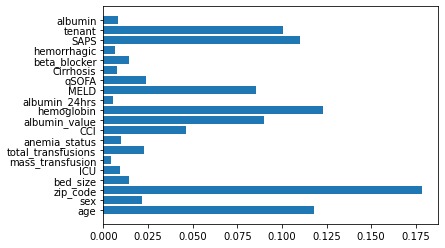

In [35]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [38]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [39]:
# calculate residual differences between train data and predictions
residuals = np.abs(y_train - y_hat_train)
# print value counts of predicted values 
print(pd.Series(residuals).value_counts())
print('----------------------------------')
# print normalized value counts of predicted values
print(pd.Series(residuals).value_counts(normalize = True))

0.0    37303
Name: 30_day_readmission, dtype: int64
----------------------------------
0.0    1.0
Name: 30_day_readmission, dtype: float64


In [40]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[24379     0]
 [    0 12924]]


In [41]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     24379
         1.0       1.00      1.00      1.00     12924

    accuracy                           1.00     37303
   macro avg       1.00      1.00      1.00     37303
weighted avg       1.00      1.00      1.00     37303



In [42]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[4359 1667]
 [1550 1750]]


In [43]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

         0.0       0.74      0.72      0.73      6026
         1.0       0.51      0.53      0.52      3300

    accuracy                           0.66      9326
   macro avg       0.62      0.63      0.63      9326
weighted avg       0.66      0.66      0.66      9326



## Tree Structure